In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar, fsolve
from scipy.stats import rv_continuous

In [56]:
def E_0(s):
  return 26 if s < 0.4 else 44 - 17 * (s - 1.46)**2
  
def T(E, s):
  return -((0.89*E_0(s) - 1.2)/(E_0(s) + E))**s * (1 + 10**(-4) * s * E)**(-2)

def cdf(E, E_min, s):
  return -T(E, s)/T(E_min, s) + 1

def cdfXLog(E, E_min, s):
  return -T(10**E, s)/T(E_min, s) + 1

def pdf(E, E_min, s):
  return T(E, s)/T(E_min, s) * s * ((E_0(s) + E)**(-1) + 2e-4 * (1 + 1e-4 * s * E)**(-1))

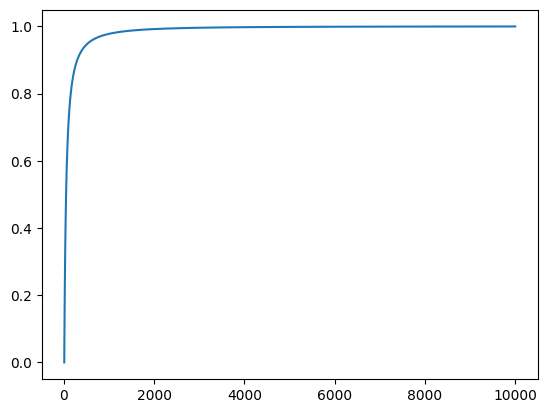

In [57]:
es = np.logspace(1, 4, 100)
plt.plot(es, cdf(es, 10, 1.2))

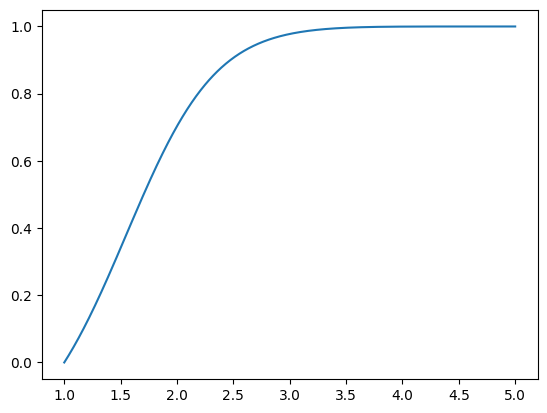

In [58]:
esl = np.linspace(1, 5, 1000)
plt.plot(esl, cdfXLog(esl, 10, 1.2))

In [59]:
def realCDF(E, r=0):
  return cdfXLog(E, 10, 1.2) - r

def randGen(num=1):
  res = []
  r_vals = np.random.rand(num)
  for r in r_vals:
    res.append(fsolve(lambda x: realCDF(x, r=r), 1)[0])
  return res

In [60]:
vals = randGen(10000)

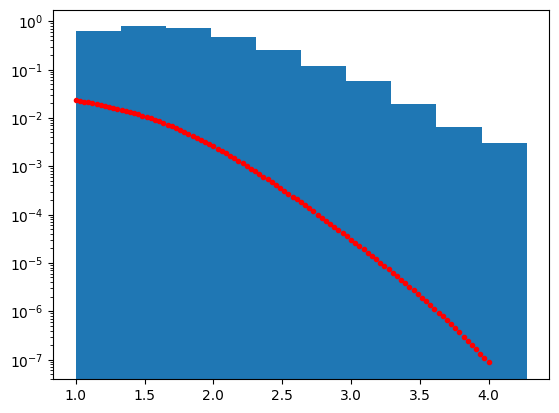

In [61]:
plt.hist(vals, density=True)
plt.plot(np.log10(es), pdf(es, 10, 1.2), 'r.')
plt.yscale('log')